In [1]:
#import libraries
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score, classification_report, precision_recall_curve)

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# load datasets

from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/datasets/customer_booking.csv', encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
#check for missing values
df.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [6]:
#check for duplicates
df.duplicated().sum()

719

In [7]:
#remove duplicate cells
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [9]:
#check unique values
df.nunique()

,0
num_passengers,9
sales_channel,2
trip_type,3
purchase_lead,470
length_of_stay,335
flight_hour,24
flight_day,7
route,799
booking_origin,104
wants_extra_baggage,2


**Feature Engineering**

In [10]:
#flight_day unique values
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [11]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [12]:
df['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [13]:
#sales_channel
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [14]:
#trip_type
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [15]:
#encode sales chanel and trip type
df = pd.get_dummies(df, columns=['sales_channel'], prefix='', prefix_sep='')
df = pd.get_dummies(df, columns=['trip_type'], prefix='', prefix_sep='')
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Internet,Mobile,CircleTrip,OneWay,RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,True,False,False,False,True
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,True,False,False,False,True
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,True,False,False,False,True
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,True,False,False,False,True
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,True,False,False,False,True


In [16]:
#drop unnecessary columns
df = df.drop(['num_passengers','route','booking_origin'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   purchase_lead          49281 non-null  int64  
 1   length_of_stay         49281 non-null  int64  
 2   flight_hour            49281 non-null  int64  
 3   flight_day             49281 non-null  int64  
 4   wants_extra_baggage    49281 non-null  int64  
 5   wants_preferred_seat   49281 non-null  int64  
 6   wants_in_flight_meals  49281 non-null  int64  
 7   flight_duration        49281 non-null  float64
 8   booking_complete       49281 non-null  int64  
 9   Internet               49281 non-null  bool   
 10  Mobile                 49281 non-null  bool   
 11  CircleTrip             49281 non-null  bool   
 12  OneWay                 49281 non-null  bool   
 13  RoundTrip              49281 non-null  bool   
dtypes: bool(5), float64(1), int64(8)
memory usage: 4.0 MB


**Split into Train Test Data**

In [17]:
#create feature matrix X and target vector y.
target = "booking_complete"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (49281, 13)
y shape: (49281,)


In [18]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (39424, 13)
y_train shape: (39424,)
X_test shape: (9857, 13)
y_test shape: (9857,)


In [19]:
#create a new feature matrix by over-sampling the training data.
oversampler = SMOTE(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (67024, 13)


,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,CircleTrip,OneWay,RoundTrip
0,69,4,1,4,1,0,0,6.33,True,False,False,False,True
1,126,17,3,4,1,0,0,8.83,True,False,False,False,True
2,20,5,23,1,1,0,0,5.62,True,False,False,False,True
3,25,28,8,4,1,0,0,5.52,True,False,False,False,True
4,231,64,13,2,1,0,1,8.83,True,False,False,False,True


In [20]:
#create a new feature matrix by over-sampling the training data.
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
print("X_train_under shape:", X_train_under.shape)
X_train_under.head()

X_train_under shape: (11824, 13)


,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,CircleTrip,OneWay,RoundTrip
36471,72,5,15,2,0,0,0,4.72,True,False,False,False,True
22003,26,89,2,1,1,0,0,8.83,True,False,False,False,True
17472,23,20,16,6,1,0,1,4.75,True,False,False,False,True
11431,10,18,3,6,0,0,0,5.07,True,False,False,False,True
14425,6,47,16,5,1,0,1,8.58,True,False,False,False,True


**Build Models**

**Model 1:Logistic Regression**

In [21]:
#fit model on oversampled data
lr_over = lr_over = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    LogisticRegression(random_state=42,max_iter=1000)
)
# Fit model to training data
lr_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [22]:
#make predictions on oversampled data
y_pred_over = lr_over.predict(X_test)

print("Classification Report - Oversampled Data:")
print(classification_report(y_test, y_pred_over))

Classification Report - Oversampled Data:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      8378
           1       0.30      0.09      0.14      1479

    accuracy                           0.83      9857
   macro avg       0.58      0.53      0.52      9857
weighted avg       0.77      0.83      0.79      9857



In [23]:
#fit model on undersampled data
lr_under = lr_under = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    LogisticRegression(random_state=42,max_iter=1000)
)
# Fit model to training data
lr_under.fit(X_train_under, y_train_under)


Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [24]:
#make predictions for undersampled dat
y_pred_under = lr_under.predict(X_test)

print("Classification Report - Undersampled Data:")
print(classification_report(y_test, y_pred_under))

Classification Report - Undersampled Data:
              precision    recall  f1-score   support

           0       0.90      0.62      0.73      8378
           1       0.22      0.62      0.33      1479

    accuracy                           0.62      9857
   macro avg       0.56      0.62      0.53      9857
weighted avg       0.80      0.62      0.67      9857



**Model 2: Random Forest**

In [25]:
#fit model on oversampled data
rf_over = rf_over = make_pipeline(SimpleImputer(), RandomForestClassifier(n_estimators=100))

# Fit model to training data
rf_over.fit(X_train_over, y_train_over)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [26]:
#calculate predictions for oversampled data
y_pred_over = rf_over.predict(X_test)
print("Classification Report - Oversampled Data:")
print(classification_report(y_test, y_pred_over))

Classification Report - Oversampled Data:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      8378
           1       0.23      0.19      0.21      1479

    accuracy                           0.78      9857
   macro avg       0.55      0.54      0.54      9857
weighted avg       0.77      0.78      0.77      9857



In [27]:
#fit model on undersampled data
rf_under = rf_under =make_pipeline(SimpleImputer(), RandomForestClassifier(n_estimators=100))

# Fit model to training data
rf_under.fit(X_train_under, y_train_under)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [28]:
#make predictions for undersampled data
y_pred_under = rf_under.predict(X_test)

print("Classification Report - Undersampled Data:")
print(classification_report(y_test, y_pred_under))

Classification Report - Undersampled Data:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      8378
           1       0.22      0.58      0.31      1479

    accuracy                           0.62      9857
   macro avg       0.55      0.60      0.53      9857
weighted avg       0.79      0.62      0.67      9857



**Model 3: Gradient Boosting**

In [29]:
#fit model on oversampled data
gb_over =  GradientBoostingClassifier(n_estimators=100)
gb_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier()

In [30]:
#make predictions on oversampled data
y_pred_over = gb_over.predict(X_test)
print("Classification Report - Oversampled Data:")
print(classification_report(y_test, y_pred_over))

Classification Report - Oversampled Data:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      8378
           1       0.23      0.23      0.23      1479

    accuracy                           0.77      9857
   macro avg       0.55      0.55      0.55      9857
weighted avg       0.77      0.77      0.77      9857



In [31]:
#fit model on undersampled data
gb_under = GradientBoostingClassifier(n_estimators=100)
gb_under.fit(X_train_under, y_train_under)


GradientBoostingClassifier()

In [32]:
#make predictions on undersampled data
y_pred_underd = gb_under.predict(X_test)
print("Classification Report - Undersampled Data:")
print(classification_report(y_test, y_pred_under))

Classification Report - Undersampled Data:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      8378
           1       0.22      0.58      0.31      1479

    accuracy                           0.62      9857
   macro avg       0.55      0.60      0.53      9857
weighted avg       0.79      0.62      0.67      9857



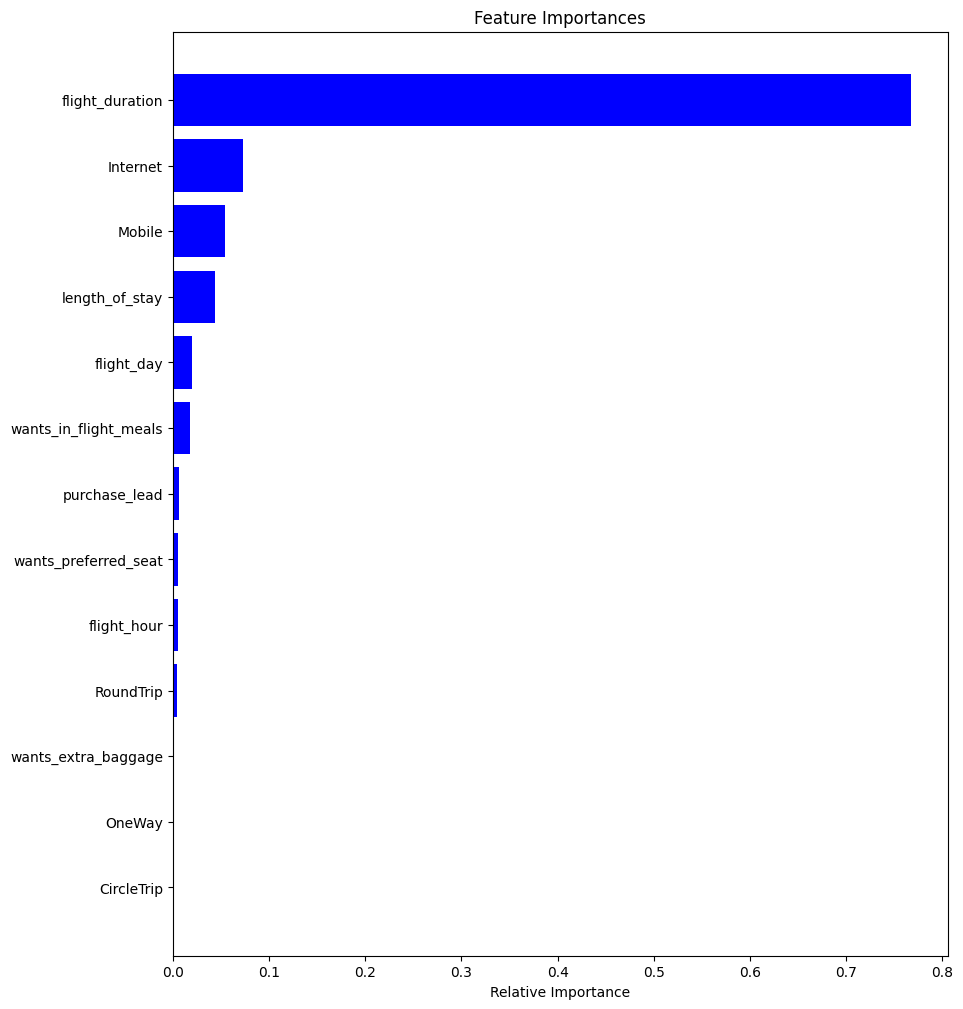

In [35]:
#features importances
features = [i.split("__")[0] for i in X.columns]
importances = gb_over.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()